# Comparison of Individual, Bagging and Boosting Algorithms

In [9]:
!pip install xgboost -q

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
# import the data
df = sns.load_dataset('diamonds')

In [47]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(53940, 10)

In [4]:
# split the data into X and y
X = df.drop('cut', axis=1)
y = df['cut']

# encode the input variables
le = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# encode the target variable
y = le.fit_transform(y)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
%%time
# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predict the test data
y_pred1 = dt.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred1))
print('Precision score: ', precision_score(y_test, y_pred1, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred1, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred1, average='micro'))

Accuracy score:  0.7134779384501297
Precision score:  0.7134779384501297
Recall score:  0.7134779384501297
F1 score:  0.7134779384501297
CPU times: total: 500 ms
Wall time: 658 ms


In [12]:
%%time
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict the test data
y_pred2 = rf.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred2))
print('Precision score: ', precision_score(y_test, y_pred2, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred2, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred2, average='micro'))

Accuracy score:  0.7840192806822395
Precision score:  0.7840192806822395
Recall score:  0.7840192806822395
F1 score:  0.7840192806822395
CPU times: total: 10.5 s
Wall time: 11.1 s


In [13]:
%%time
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred3 = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred3))
print('Precision score: ', precision_score(y_test, y_pred3, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred3, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred3, average='micro'))

Accuracy score:  0.8010752688172043
Precision score:  0.8010752688172043
Recall score:  0.8010752688172043
F1 score:  0.8010752688172043
CPU times: total: 20 s
Wall time: 6.1 s


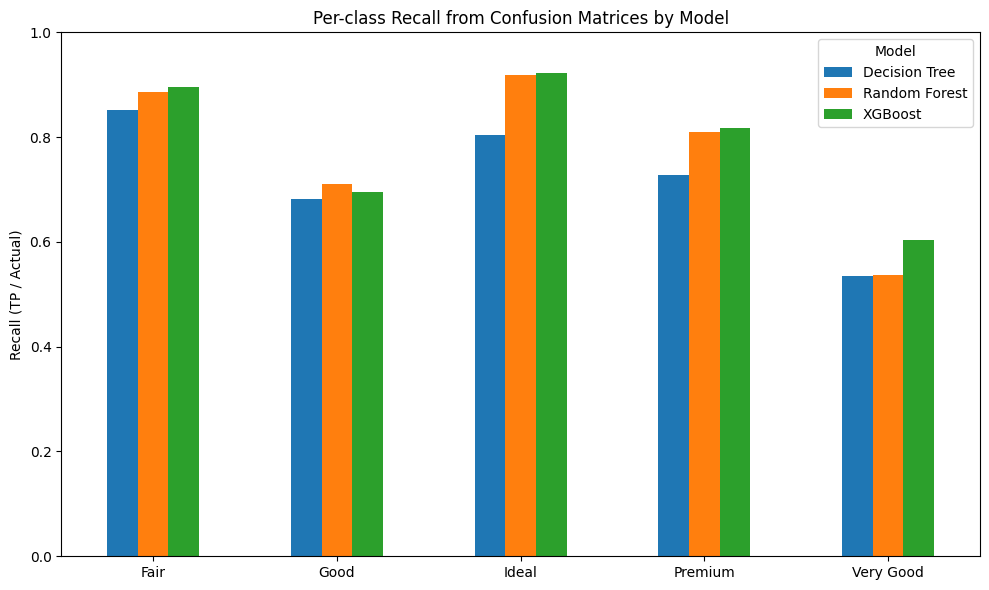

In [15]:
from sklearn.metrics import confusion_matrix

# compute confusion matrices
cm_dt = confusion_matrix(y_test, y_pred1)
cm_rf = confusion_matrix(y_test, y_pred2)
cm_xgb = confusion_matrix(y_test, y_pred3)

# per-class recall (true positives / actual)
cms = {'Decision Tree': cm_dt, 'Random Forest': cm_rf, 'XGBoost': cm_xgb}
n_classes = cm_dt.shape[0]
class_idx = np.arange(n_classes)
# use label encoder to get original class names if available
try:
    class_names = le.inverse_transform(class_idx)
except Exception:
    class_names = [f'class_{i}' for i in class_idx]

recall_df = pd.DataFrame(
    {name: np.diag(cm) / cm.sum(axis=1) for name, cm in cms.items()},
    index=class_names
)

# plot grouped bar chart of per-class recall for each model
ax = recall_df.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Recall (TP / Actual)')
ax.set_title('Per-class Recall from Confusion Matrices by Model')
ax.set_ylim(0, 1)
ax.legend(title='Model')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()